In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('seaborn')

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['LiSong Pro Light']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('./data/pressure_raw.xlsx', sheet_name='整理后')

In [3]:
area_blu = df[df['测试区域'] == '蓝']
area_gre = df[df['测试区域'] == '绿']
area_red = df[df['测试区域'] == '红']
area_pin = df[df['测试区域'] == '粉']
area_yel = df[df['测试区域'] == '黄']

pos_up = df[df['测试位置'] == '上']
pos_mid = df[df['测试位置'] == '中']
pos_bot = df[df['测试位置'] == '下']

In [4]:
def fetch_mean(df: pd.DataFrame, arg: str) -> float:
    return df[arg].mean()

def fetch_std(df: pd.DataFrame, arg: str) -> float:
    return df[arg].std()

In [5]:
level_list = ['明显触觉', '轻微不适', '明显疼痛']

area_blu_val, area_gre_val, area_red_val, area_pin_val, area_yel_val = [], [], [], [], []
pos_up_val, pos_mid_val, pos_bot_val = [], [], []

area_list = [area_blu, area_gre, area_red, area_pin, area_yel]
pos_list = [pos_up, pos_mid, pos_bot]

area_val_list = [area_blu_val, area_gre_val, area_red_val, area_pin_val, area_yel_val]
pos_val_list = [pos_up_val, pos_mid_val, pos_bot_val]

for i in range(len(level_list)):
    for j in range(len(area_val_list)):
        area_val_list[j].append(round(fetch_mean(area_list[j], level_list[i]), 2))
    for j in range(len(pos_val_list)):
        pos_val_list[j].append(round(fetch_mean(pos_list[j], level_list[i]), 2))

In [6]:
# row, column conversion

area_graph_list = [[0 for i in range(5)] for j in range(3)]
pos_graph_list = [[0 for i in range(3)] for j in range(3)]

for i in range(3):
    for j in range(5):
        area_graph_list[i][j] = area_val_list[j][i]
        
for i in range(3):
    for j in range(3):
        pos_graph_list[j][i] = pos_val_list[i][j]

In [7]:
# standard deviation calculations

area_std_list = [[0 for i in range(5)] for j in range(3)]
pos_std_list = [[0 for i in range(3)] for j in range(3)]

for i in range(3):
    for j in range(5):
        area_std_list[i][j] = fetch_std(area_list[j], level_list[i])
        
for i in range(3):
    for j in range(3):
        pos_std_list[i][j] = fetch_std(pos_list[j], level_list[i])

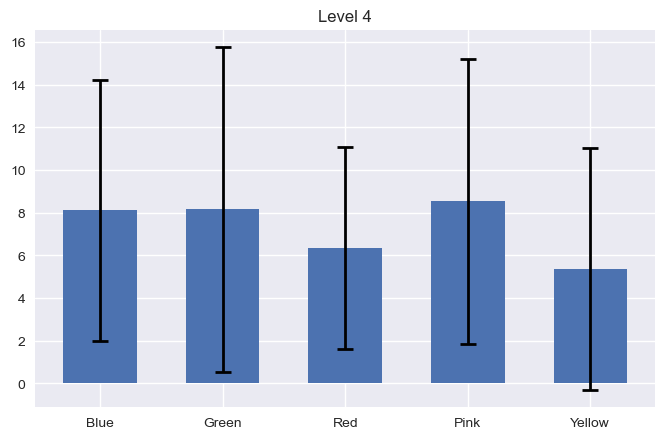

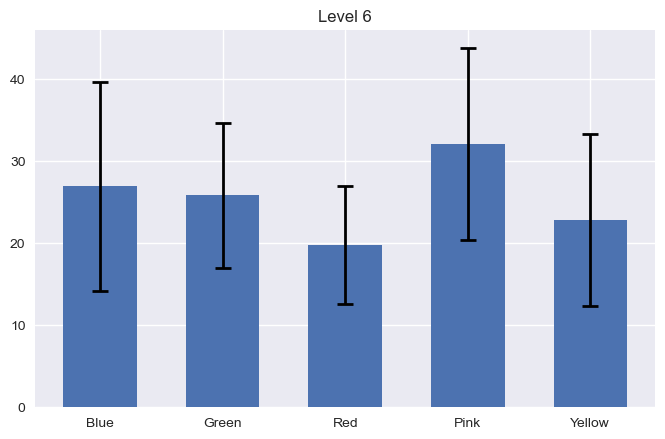

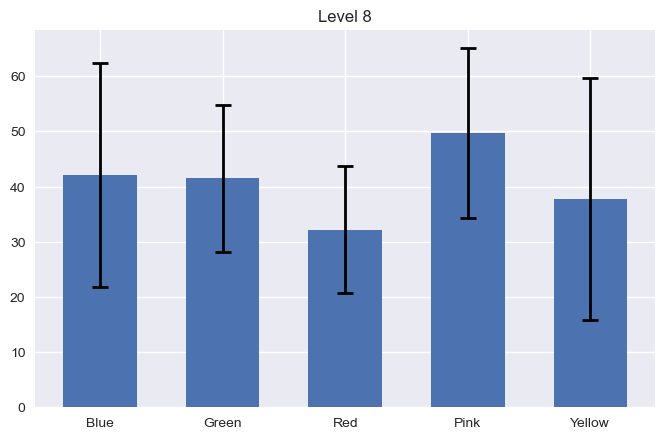

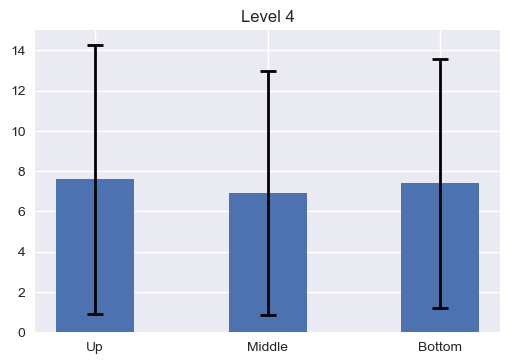

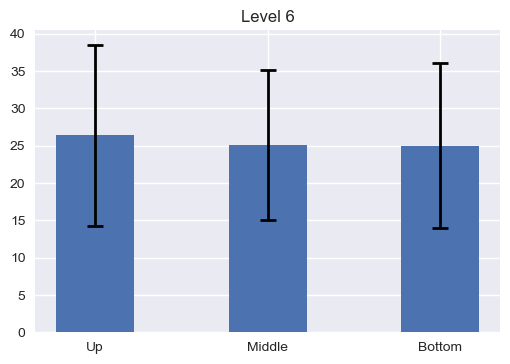

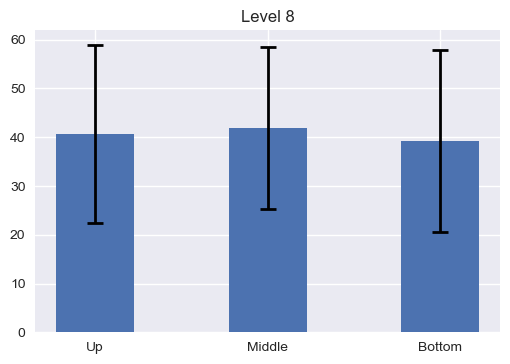

In [8]:
area_label_list = ['Blue', 'Green', 'Red', 'Pink', 'Yellow']
pos_label_list = ['Up', 'Middle', 'Bottom']

level_label_list = ['Level 4', 'Level 6', 'Level 8']

for i in range(len(area_graph_list)):
    figure(figsize=(8, 5), dpi=100)
    plt.bar(area_label_list, area_graph_list[i], yerr=area_std_list[i], width=0.6, error_kw=dict(lw=2, capsize=6, capthick=2))
    plt.title(level_label_list[i])
    plt.savefig('./img/Area - ' + level_label_list[i] + '.png', format='png', dpi=200)
    
for i in range(len(pos_graph_list)):
    figure(figsize=(6, 4), dpi=100)
    plt.bar(pos_label_list, pos_graph_list[i], yerr=pos_std_list[i], width=0.45, error_kw=dict(lw=2, capsize=6, capthick=2))
    plt.title(level_label_list[i])
    plt.savefig('./img/Position - ' + level_label_list[i] + '.png', format='png', dpi=200)
    
# originally line charts were requested, the parameters >>marker='o', markerfacecolor='m'<< were chosen